# INFO 1998 Final Project 
# by Markus Beasley and Mohmamed Bari

__INTRODUCTION__

This project will use machine learning techniques in order to predict and understand the question: What factors affect a player's points per game in the regular season? 

Techniques learned from this course will be applied to determine which factors play the biggest role in affecting a player's points per game and how this statistic can be predicted using machine learning models. We will specifically exclude features relating to offensive statistics in our project because these would predict with a near perfect accuracy and we are looking for some less intuitive features that can be used to predict points per game. Some of these less intuitive features would include the age of a player, how many blocks they had, or rebounds etc.

__SOURCES__

The following CSV file was found on Kaggle.com and was obtained under the CC 4.0 free and public use license.

The data set can be found through this link: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular

In [117]:
#importing packages
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [118]:
#Loading the data and getting its general info
df = pd.read_csv('2022-2023NBAPlayerStats-Regular.csv', sep=';', encoding='latin1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


__Data Visualization__

We will now look at our data in the form of graphs to see if we can determine any trends prior to using machine learning to answer our question. 

Based on common sense it can be assumed that someone who is older and has played more games during the season will have more experience and will therefore score more points. We will investigate this using a pie chart.

/var/folders/cl/rt7yhgcs66z130893pc2kbzw0000gn/T/ipykernel_39428/3291692929.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  older_equalto_30_points  = older_equalto_30[df['PTS'] > 15]
/var/folders/cl/rt7yhgcs66z130893pc2kbzw0000gn/T/ipykernel_39428/3291692929.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  younger_30_points = younger_30[df['PTS'] > 15]
/var/folders/cl/rt7yhgcs66z130893pc2kbzw0000gn/T/ipykernel_39428/3291692929.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_more_equalto_50_points = games_more_equalto_50[df['PTS'] > 15]
/var/folders/cl/rt7yhgcs66z130893pc2kbzw0000gn/T/ipykernel_39428/3291692929.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_less_50_points = games_less_50[df['PTS'] > 15]


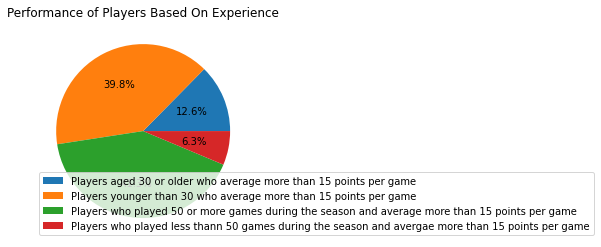

In [119]:
older_equalto_30 = df[df['Age'] >= 30]
younger_30 = df[df['Age'] < 30]
games_more_equalto_50 = df[df['G'] >= 50]
games_less_50 = df[df['G'] < 30]

older_equalto_30_points  = older_equalto_30[df['PTS'] > 15]
younger_30_points = younger_30[df['PTS'] > 15]
games_more_equalto_50_points = games_more_equalto_50[df['PTS'] > 15]
games_less_50_points = games_less_50[df['PTS'] > 15]

plt.pie(x=[len(older_equalto_30_points), len(younger_30_points), len(games_more_equalto_50_points), len(games_less_50_points)], autopct='%1.1f%%',)
plt.legend(['Players aged 30 or older who average more than 15 points per game', 'Players younger than 30 who average more than 15 points per game','Players who played 50 or more games during the season and average more than 15 points per game', 'Players who played less thann 50 games during the season and avergae more than 15 points per game'])
plt.title('Performance of Players Based On Experience')
plt.show()

The pie chart seems to show that players with more experience, whether its in age or games played, score more points per game than players who have less exerience.

In this next section personal fouls per game will graphed against the points scored per game to determine if this factors into how many points per game a player will score. For exmaple, it could be that a player who fouls a lot will also not score a lot because they are in a more defense oriented position. 

The average number of personal fouls per game is:  1.660677466863034


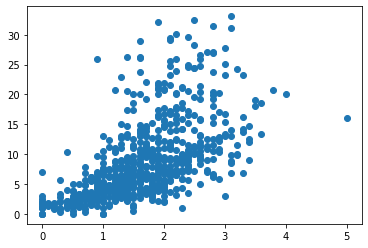

In [120]:
x = df['PF']
y = df['PTS']
print("The average number of personal fouls per game is: ", x.mean())
plt.scatter(x, y)
plt.show()

From this scatter plot it can be seen that there is rough correlation between points scored and fouls per game. It seems that players who average less than one personal foul per game do not score a lot of points in comparison. From this data we can infer its probably because they don't get a lot of playtime. Since this correlation is still pretty rough, there are likely better features to predict points per game which we will find later in this project.

__MODELS__

Now that we have some idea of what factors affect how many points per game a player will score, we will now use machine learning models to predict a player's points per game based on those factors. We will also test multiple factors and multiple models to see which combination can best predict a player's points per game statistic.

To start we will use a linear regression model.

First we need to manipulate the data set to get rid of feautures which are irrelevant to our question or feautures which are not numerical since it would be hard to use linear regression on them. We will also get rid of any features relating to offensive statistics. It would be trivial to use these features predict points scored per game since they would predict it with very high accuracy and we are looking for alternative features that could be used to do this. 

In [121]:
# removing all offensive and irrelevant features from the dataframe we are working with
columns_to_drop = ['Rk', 'Player', 'Pos', 'Tm', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'AST', 'eFG%']
new_df = df.drop(columns=columns_to_drop)
new_df

,Age,G,GS,MP,DRB,TRB,STL,BLK,TOV,PF,PTS
0,23,55,12,20.7,4.1,6.0,0.6,0.5,1.1,1.9,9.2
1,29,42,42,27.0,6.5,11.5,0.9,1.1,1.9,2.3,8.6
2,25,75,75,34.6,6.7,9.2,1.2,0.8,2.5,2.8,20.4
3,22,59,22,20.5,1.3,2.1,0.3,0.3,0.7,1.7,7.9
4,22,77,20,21.8,3.7,4.8,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...
674,34,54,9,14.7,1.8,3.1,1.0,0.1,0.8,1.6,4.4
675,24,73,73,34.8,2.2,3.0,1.1,0.1,4.1,1.4,26.2
676,24,9,0,9.2,1.7,2.6,0.2,0.2,0.4,1.8,4.4
677,30,15,2,14.5,2.6,4.3,0.2,0.3,0.9,2.2,6.5


Now for the linear regression we will find the best feature to predict points per game by creating a model for every feature in our new data frame and finding the one with the highest testing accuracy. We will also do this using two features instead of one to see if we can come up with an even more accurate model to predict a players points per game. 

In [122]:
best_feature = ''
testing_score = 0
y = new_df['PTS']

for feature in new_df.columns.drop(['PTS']):
    X = new_df[feature].to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    if model.score(X_test, y_test) > testing_score:
        testing_score = model.score(X_test, y_test)
        best_feature = feature
print("The single best feature to predict a player's points per game is: ", best_feature, " with a testing score of: ", testing_score)


The single best feature to predict a player's points per game is:  MP  with a testing score of:  0.7601854599989968


We have found that the single best feature we can use to predict points per game is MP which is average number of minutes played a player has per game. We will now use two differnt features in our linear regression to see if we can obtain a higher testing score. 

In [123]:
best_features = ''
testing_score = 0
y = new_df['PTS']

for feature1 in new_df.columns.drop(['PTS']):
    for feature2 in new_df.columns.drop(['PTS', feature1]):
        X = new_df[[feature1, feature2]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        model.score(X_test, y_test)
        if model.score(X_test, y_test) > testing_score:
            testing_score = model.score(X_test, y_test)
            best_features = feature1, feature2
print("The best pair of features to predict a player's points per game is: ", best_features, " with a testing score of: ", testing_score)
        

        


The best pair of features to predict a player's points per game is:  ('MP', 'TOV')  with a testing score of:  0.8105791071173822


Using two features instead of just one, we were able to obtain a higher testing score. The best pair of features were MP and TOV which is minutes played per game and turnovers per game. 

We will now use decision tree regression to predict a players points per game and we will compare the results with our predictions using linear regression. To find the most accurate decision tree we will test multiple different values of max depth and compare their testing accuracy scores.

In [124]:
X = new_df.drop(columns = ['PTS'])
Y = new_df['PTS']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1998)
best_score = 0
best_max_depth = 0

for i in range(1,500):
    model = tree.DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    if score > best_score:
        best_score = score
        best_max_depth = i
print("The best testing score is: ", best_score, " With a max_depth value of: ", best_max_depth)
    
    




The best testing score is:  0.8308687186016313  With a max_depth value of:  4


From this testing score we can see that its greater than both the testing scores of when we used a linear regression model.

__CONCLUSION__

A decision tree regressor is the best model to predict the amount of points per game a basketball player will score using non offensive statistics. We know this because it had a higher testing accuracy than both linear regression models and this is likely because decision trees are often better at capturing non linear relationships and we saw in our data visualization how some of the features have a very weak linear relationship to points scored per game. 